In [37]:
import sys
import pandas as pd

parent_dir = '/home/sei/tetrahedron_pair_ML'
sys.path.append(parent_dir)

n = 800000
tetrahedron_dataset = pd.read_csv('/home/sei/tetrahedron_pair_ML/data/processed/train/train_data.csv')

def has_t2_columns(df):
    """Check if the dataframe contains T2 columns"""
    return any(col.startswith('T2_') for col in df.columns)

### Dataset Structure:

In [38]:
tetrahedron_dataset.head()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,T1_v4_y,T1_v4_z,IntersectionVolume,HasIntersection
0,3.126105,1.486892,-5.226193,2.861616,1.647517,-5.244402,1.531149,0.289633,-1.252735,0.489261,0.441654,0.412129,0.000000,0
1,1.479773,0.816224,-1.901065,-4.933810,1.849368,4.962782,-2.698596,0.246704,3.062556,0.996621,0.694259,-1.208872,0.000000,0
2,0.377075,-0.083629,-1.400283,0.840047,-0.025530,-1.127505,1.118577,-0.402685,0.111247,1.915808,-1.137303,-2.442562,0.000000,0
3,1.016617,-0.192664,0.149370,-0.173307,0.336473,-0.081395,0.573994,-0.749595,0.890857,0.226982,1.043537,-0.276466,7264.135671,1
4,2.383348,0.945194,-3.177267,3.385693,1.170566,-5.345724,2.253267,0.374123,-2.283182,0.258918,-0.035622,0.010968,0.000000,0


- **Tetrahedrons:**
  - Each entry includes two tetrahedrons.
  - Each tetrahedron has four vertices.
  - Each vertex is defined by three coordinates (x, y, z).

- **Features:**
  - There are 12 features per tetrahedron, leading to 24 features total.
  - Column names follow the pattern `Tₜ_Vᵥ_α`, where:
    - `ₜ` = Tetrahedron number (1 or 2)
    - `ᵥ` = Vertex number (1 to 4)
    - `α` = Coordinate axis (x, y, or z)
  - Coordinates are normalized between 0 and 1.
  - Each coordinate is randomly generated through a i.i.d process.

- **Output Variables:**
  - **Intersection Status:**
    - Stored in the "intersection_status" column.
    - Values: `0` (no intersection) or `1` (intersection).
  - **Intersection Volume:**
    - Stored in the "intersection_volume" column.
    - Value is a non-negative real number.

### Input and Output Spaces:

- **Input Space:**
  - Represented as a vector in $\mathbb{R}^{24}$, where each coordinate is within the range $[0, 1]$.

- **Output Space:**
  - $\{0, 1\}$ for "HasIntersection".
  - $\mathbb{R}^{\geq 0}$ for "IntersectionVolume"

### Statistics


In [39]:
tetrahedron_dataset.describe()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,T1_v4_y,T1_v4_z,IntersectionVolume,HasIntersection
count,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,800000.000000,800000.000000
mean,-3.327246e+00,-1.092607e+01,1.488105e+01,-6.509226e+00,-1.703399e+01,2.675400e+01,-5.502812e+00,-1.576362e+01,2.254739e+01,6.750549e+03,6.737393e+03,-2.022707e+04,1349.992658,0.570000
std,3.239836e+03,9.222069e+03,1.372127e+04,5.734750e+03,1.627168e+04,2.428664e+04,5.023333e+03,1.429846e+04,2.129516e+04,2.391345e+06,2.391391e+06,7.174043e+06,2679.073960,0.495076
min,-2.890372e+06,-8.212426e+06,-1.976634e+05,-5.115291e+06,-1.453409e+07,-6.800863e+05,-4.481892e+06,-1.273442e+07,-8.600999e+05,-1.798777e+08,-1.798776e+08,-3.518612e+09,0.000000,0.000000
25%,-4.693408e-01,-4.747767e-01,-2.384734e-01,-4.961776e-01,-4.965972e-01,-2.730766e-01,-4.880014e-01,-4.950854e-01,-3.250796e-01,-4.656698e-01,-5.027271e-01,-1.142367e+00,0.000000,0.000000
50%,2.863135e-01,2.823610e-01,1.192093e-07,2.920591e-01,2.888945e-01,1.192093e-07,2.957751e-01,2.909221e-01,8.940697e-08,3.799187e-01,3.639830e-01,-1.031073e-01,0.000000,1.000000
75%,1.030098e+00,1.030597e+00,7.678138e-01,1.062295e+00,1.063853e+00,7.670799e-01,1.067449e+00,1.064137e+00,7.655009e-01,1.289655e+00,1.280036e+00,7.555838e-01,740.692048,1.000000
max,8.017948e+04,2.456472e+05,1.226726e+07,8.145080e+04,6.603996e+05,2.171022e+07,1.750831e+05,3.926003e+05,1.902196e+07,1.172871e+09,1.172871e+09,5.396330e+08,9999.988745,1.000000


#### Class Balance

In [40]:
total_entries = len(tetrahedron_dataset)
status_0_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 0].shape[0]
status_1_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1].shape[0]

percentage_status_0 = (status_0_count / total_entries) * 100
percentage_status_1 = (status_1_count / total_entries) * 100

print(f"Percentage of entries with HasIntersection = 0: {percentage_status_0:.2f}%")
print(f"Percentage of entries with HasIntersection = 1: {percentage_status_1:.2f}%")

Percentage of entries with HasIntersection = 0: 43.00%
Percentage of entries with HasIntersection = 1: 57.00%


#### Coordinates precision

In [41]:
# Extract all coordinate columns
coordinate_columns = [col for col in tetrahedron_dataset.columns if '_v' in col]

def calculate_precision(value):
    value_str = str(value)
    if '.' in value_str:
        return len(value_str.split('.')[1])
    else:
        return 0

max_precision = 0
min_precision = float('inf')

for col in coordinate_columns:
    col_precision = tetrahedron_dataset[col].map(calculate_precision)
    max_precision = max(max_precision, col_precision.max())
    min_precision = min(min_precision, col_precision.min())

print(f"Min coordinate precision in the dataset: {min_precision} decimal places")
print(f"Max coordinate precision in the dataset: {max_precision} decimal places")

Min coordinate precision in the dataset: 1 decimal places
Max coordinate precision in the dataset: 12 decimal places


#### Coordinates distribution

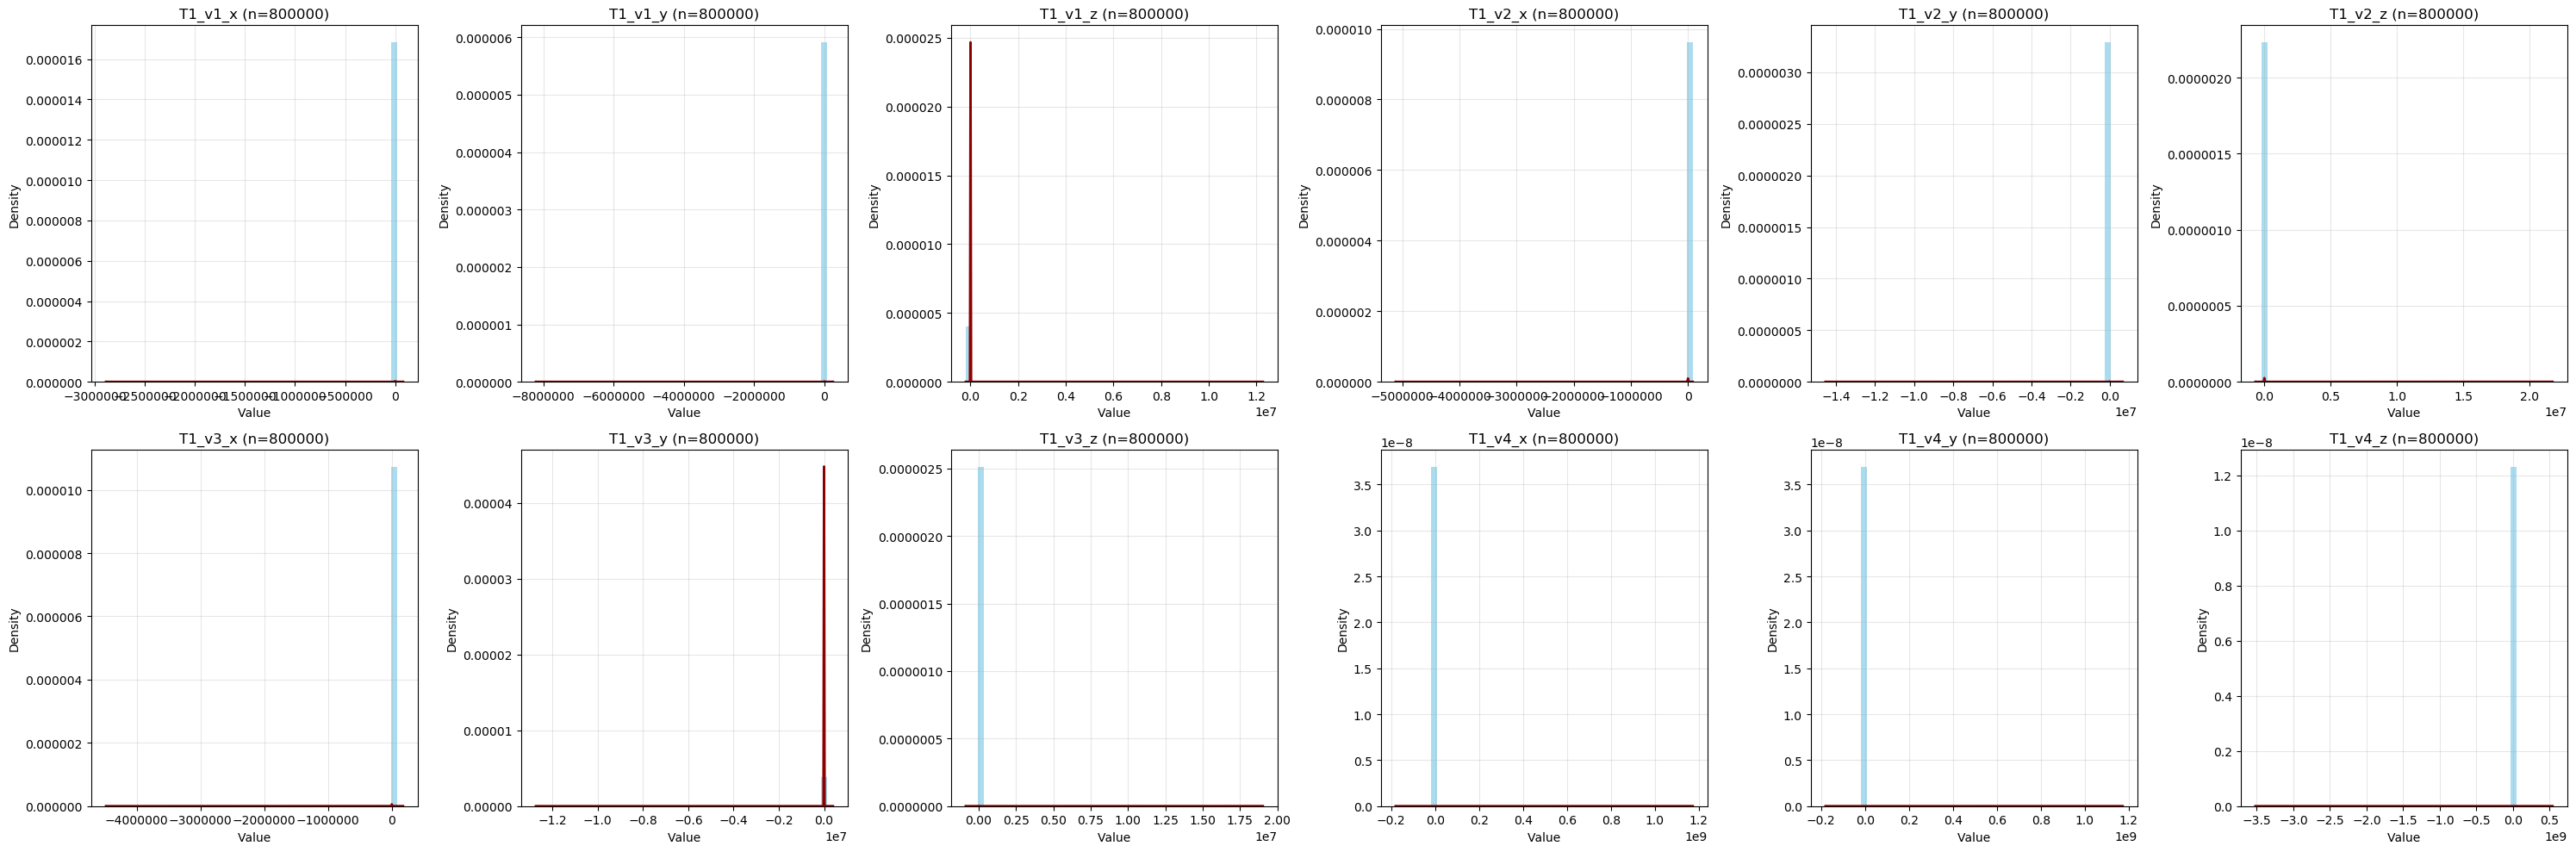

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.stats import gaussian_kde

# Define tetrahedrons, points, and coordinates
tetrahedrons = ['T1']
if has_t2_columns(tetrahedron_dataset):
    tetrahedrons.append('T2')
points = ['v1', 'v2', 'v3', 'v4']
coordinates = ['x', 'y', 'z']

# Build the list of column names in the order: T1_v1_x, T1_v1_y, T1_v1_z, ..., T2_v4_z
columns = [f'{tetra}_{point}_{coord}' for tetra in tetrahedrons for point in points for coord in coordinates]

# Adjust your subplot layout based on number of columns
ncols = min(6, len(columns))
nrows = (len(columns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]  # Handle single plot case


for ax, col in zip(axes, columns):
    # Extract the data for the current column from the DataFrame
    data = np.ravel(tetrahedron_dataset[col].to_numpy(copy=False))
    
    # Plot the histogram (normalized to density)
    ax.hist(data, bins=50, color='skyblue', density=True, alpha=0.7)
    
    # Compute and plot the Kernel Density Estimate
    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 500)
    ax.plot(x_vals, kde(x_vals), color='darkred', lw=2)
    
    # Formatting
    ax.set_title(f'{col} (n={len(data)})', fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Tetrahedron volume distribution

In [43]:
### Get Data ###
import src.GeometryUtils as gu


def extract_t1_vertices(row):
    return torch.tensor([
        [row['T1_v1_x'], row['T1_v1_y'], row['T1_v1_z']],
        [row['T1_v2_x'], row['T1_v2_y'], row['T1_v2_z']],
        [row['T1_v3_x'], row['T1_v3_y'], row['T1_v3_z']],
        [row['T1_v4_x'], row['T1_v4_y'], row['T1_v4_z']]
    ])

def extract_t2_vertices(row):
    return torch.tensor([
        [row['T2_v1_x'], row['T2_v1_y'], row['T2_v1_z']],
        [row['T2_v2_x'], row['T2_v2_y'], row['T2_v2_z']],
        [row['T2_v3_x'], row['T2_v3_y'], row['T2_v3_z']],
        [row['T2_v4_x'], row['T2_v4_y'], row['T2_v4_z']]
    ])

t1_volumes = []
t2_volumes = []

for _, row in tetrahedron_dataset.iterrows():
    t1_vertices = extract_t1_vertices(row)
    volume = gu.calculate_tetrahedron_volume(t1_vertices)
    t1_volumes.append(volume.item())
    
    if has_t2_columns(tetrahedron_dataset):
        t2_vertices = extract_t2_vertices(row)
        volume = gu.calculate_tetrahedron_volume(t2_vertices)
        t2_volumes.append(volume.item())

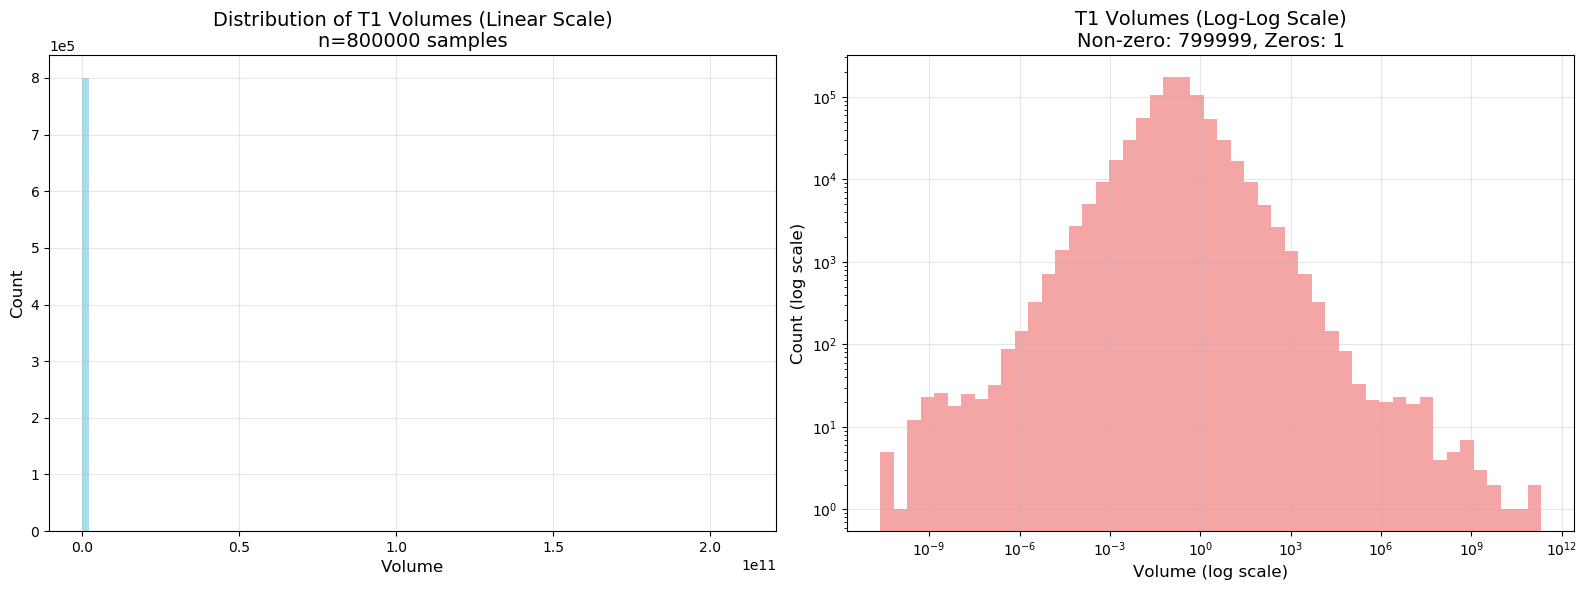

In [44]:
volumes_t1 = np.array(t1_volumes).ravel()
volumes_t2 = np.array(t2_volumes).ravel()

if has_t2_columns(tetrahedron_dataset):
    # Create two subplots (original code)
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Plot for T1
    counts, bins, _ = axes[0].hist(volumes_t1, bins=50, color='skyblue', alpha=0.5)
    kde = gaussian_kde(volumes_t1)
    x = np.linspace(volumes_t1.min(), volumes_t1.max(), 500)
    axes[0].plot(x, kde(x) * len(volumes_t1) * (bins[1] - bins[0]), color='darkred', lw=2)
    axes[0].set_title(f'Distribution of T1 Volumes (n={len(volumes_t1)})', fontsize=16)
    axes[0].set_xlabel('Volume', fontsize=14)
    axes[0].set_ylabel('Count', fontsize=14)
    axes[0].set_xlim(0, volumes_t1.max())
    axes[0].grid(True, alpha=0.3)

    # Plot for T2
    counts, bins, _ = axes[1].hist(volumes_t2, bins=50, color='skyblue', alpha=0.5)
    kde = gaussian_kde(volumes_t2)
    x = np.linspace(volumes_t2.min(), volumes_t2.max(), 500)
    axes[1].plot(x, kde(x) * len(volumes_t2) * (bins[1] - bins[0]), color='darkred', lw=2)
    axes[1].set_title(f'Distribution of T2 Volumes (n={len(volumes_t2)})', fontsize=16)
    axes[1].set_xlabel('Volume', fontsize=14)
    axes[1].set_ylabel('Count', fontsize=14)
    axes[1].set_xlim(0, volumes_t2.max())
    axes[1].grid(True, alpha=0.3)


    # --- Joint Distribution Plot ---
    hist2d_bins = 50
    H, xedges, yedges = np.histogram2d(volumes_t1, volumes_t2, bins=hist2d_bins)

    # Transpose H because pcolormesh expects (Y, X) dimensions
    H = H.T

    X, Y = np.meshgrid(xedges, yedges)
    pcm = axes[2].pcolormesh(X, Y, H, cmap='viridis', shading='auto')
    axes[2].set_title('Joint Distribution of T1 and T2 Volumes', fontsize=14)
    axes[2].set_xlabel('Volume T1', fontsize=12)
    axes[2].set_ylabel('Volume T2', fontsize=12)
    axes[2].set_xlim(0, 0.03) 
    axes[2].set_ylim(0, 0.03) 

    fig.colorbar(pcm, ax=axes[2], label='Counts')
    axes[2].grid(True, alpha=0.3)
else:
    # Create a single plot for T1 only - handle full range with log scale
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Linear scale histogram for all data
    counts, bins, _ = ax1.hist(volumes_t1, bins=100, color='skyblue', alpha=0.7)
    ax1.set_title(f'Distribution of T1 Volumes (Linear Scale)\nn={len(volumes_t1)} samples', fontsize=14)
    ax1.set_xlabel('Volume', fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    ax1.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    
    # Plot 2: Log scale for better visualization of distribution shape
    # Separate zeros and non-zeros
    volumes_nonzero = volumes_t1[volumes_t1 > 0]
    zero_count = len(volumes_t1) - len(volumes_nonzero)
    
    if len(volumes_nonzero) > 0:
        # Use log-spaced bins for better distribution
        log_bins = np.logspace(np.log10(volumes_nonzero.min()), 
                              np.log10(volumes_nonzero.max()), 
                              50)
        
        ax2.hist(volumes_nonzero, bins=log_bins, color='lightcoral', alpha=0.7)
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        ax2.set_title(f'T1 Volumes (Log-Log Scale)\nNon-zero: {len(volumes_nonzero)}, Zeros: {zero_count}', fontsize=14)
        ax2.set_xlabel('Volume (log scale)', fontsize=12)
        ax2.set_ylabel('Count (log scale)', fontsize=12)
        ax2.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

#### Intersection volume distribution

Intersecting samples: 216,000 (27.0%)
Volume range: 0.000000 to 0.010000


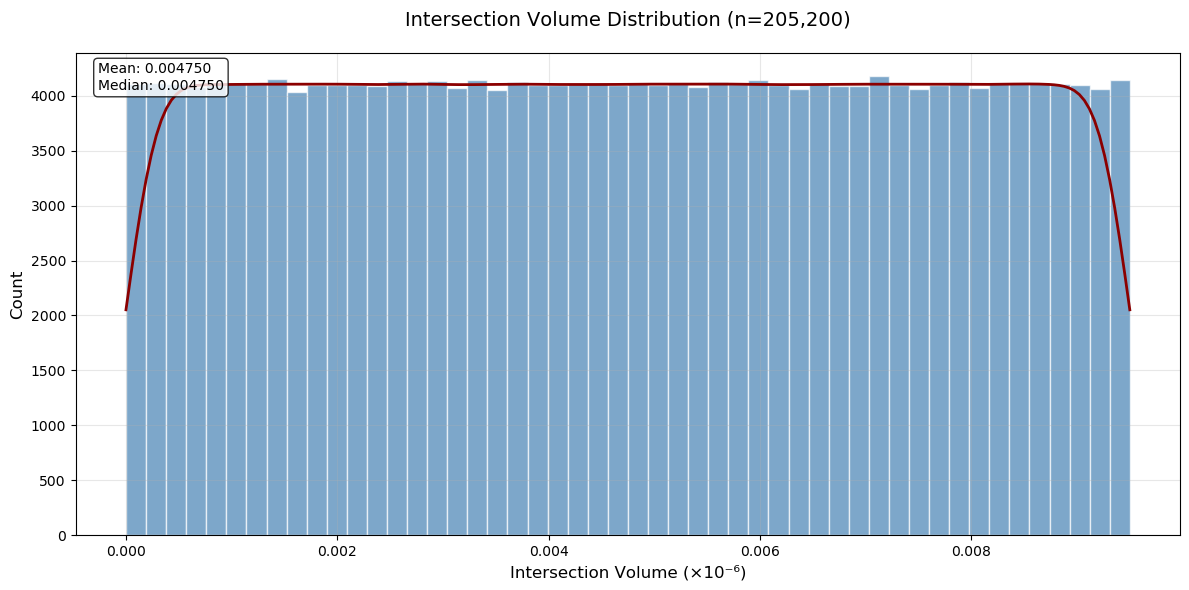

Key percentiles: 50th=0.005000, 95th=0.009500, 99th=0.009900


In [45]:
# Intersection Volume Distribution
intersecting_cases = tetrahedron_dataset[tetrahedron_dataset['IntersectionVolume'] > 0]

if len(intersecting_cases) > 0:
    scaling_factor = 1000000
    volumes = intersecting_cases['IntersectionVolume'].to_numpy() / scaling_factor
    
    print(f"Intersecting samples: {len(volumes):,} ({len(volumes)/len(tetrahedron_dataset)*100:.1f}%)")
    print(f"Volume range: {volumes.min():.6f} to {volumes.max():.6f}")
    
    # Single clean plot
    plt.figure(figsize=(12, 6))
    
    # Use 95th percentile to handle outliers
    max_vol = np.percentile(volumes, 95)
    volumes_clean = volumes[volumes <= max_vol]
    
    # Simple histogram
    plt.hist(volumes_clean, bins=50, color='steelblue', alpha=0.7, edgecolor='white')
    
    # Add KDE for smoothness
    kde = gaussian_kde(volumes_clean)
    x = np.linspace(0, max_vol, 200)
    plt.plot(x, kde(x) * len(volumes_clean) * (max_vol/50), 'darkred', lw=2)
    
    # Clean formatting
    plt.title(f'Intersection Volume Distribution (n={len(volumes_clean):,})', fontsize=14, pad=20)
    plt.xlabel('Intersection Volume (×10⁻⁶)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(alpha=0.3)
    

    plt.text(0.02, 0.98, f'Mean: {volumes_clean.mean():.6f}\nMedian: {np.median(volumes_clean):.6f}', 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Essential percentiles
    print(f"Key percentiles: 50th={np.percentile(volumes, 50):.6f}, "
          f"95th={np.percentile(volumes, 95):.6f}, "
          f"99th={np.percentile(volumes, 99):.6f}")

else:
    print("No intersecting cases found")
    plt.figure(figsize=(8, 5))
    plt.bar(['No Intersection', 'Intersection'], 
            [len(tetrahedron_dataset), 0], 
            color=['lightgray', 'steelblue'])
    plt.title('Intersection Status Distribution')
    plt.ylabel('Count')
    plt.show()